Dean Sayre
Lecture 15 Homework

## Solve the potential of a line mass (i.e. one zone at x=50, y=50 with nonzero density and all others with zero density)using SOR. 

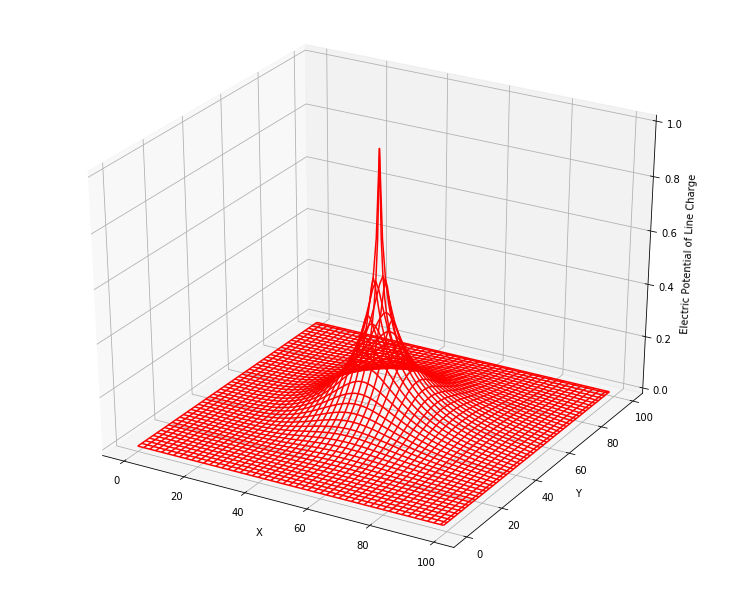

In [1]:
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import *
%matplotlib inline
import numpy as np
import sys

omega=1.8
Nmax = 100
Niter = 3000
V = zeros((Nmax, Nmax), float)   
G = 1.
rho = 1. 

V[50,50] = 1 # boundary condition: one zone at x=50, y=50 with nonzero density

for iter in range(Niter):                                  
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1):
            # boundary condition: all others with zero density
            if j != 50 or i != 50: 
                du = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-V[i,j]
                if(maxerr<abs(du)):
                    maxerr=abs(du)
                V[i,j] = V[i,j] + omega*du
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = plt.meshgrid(x,y)                 

def functz(V):                                      
    z = V[X,Y]                        
    return z

Z = functz(V) 
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)                                      
ax.plot_wireframe(X, Y, Z, color = 'r')               
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Electric Potential of Line Charge')
plt.show()

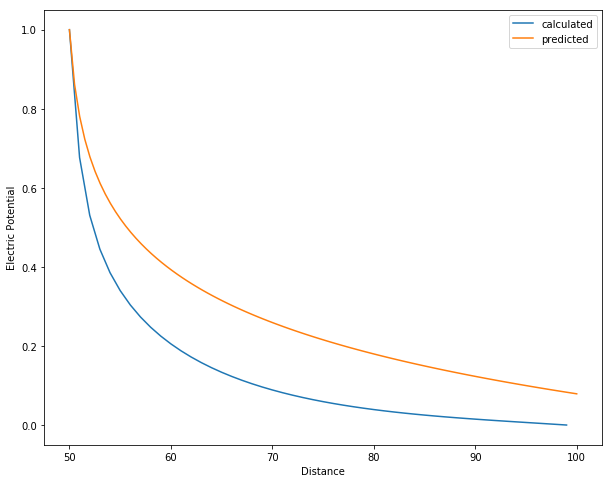

In [2]:
c=1
mu=1
func = lambda r: -2*G*0.1*np.log(r)+c
V_th = []
for i in range(0,100):
    V_th.append(func(i+1))

fig = plt.figure(figsize=(10,8))
plt.xlabel('Distance')
plt.ylabel('Electric Potential')
plt.plot(x[50:],Z[50,50:],label='calculated')
x = np.linspace(50,100,100) # redefine x range from 0,50 to 0,100 to compare calculated and expected
plt.plot(x,V_th,label='predicted')
plt.legend(loc='best')
plt.show()

## As can be seen form above, the potential does have radial on the close to 2*G*0.1*np.log(r)+c. At the location of the line chage, r = 50, the electric potential is at its maximum. Both in calculation and from theory. 